# SIMULACIÓN | LABORATORIO 3



### CONTENIDOS
1. Histogramas y Distribución empírica
2. Estimadores de máxima verosimilitud
3. Test de bondad de ajuste 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats 
from IPython.display import display
import ipywidgets as widgets
from IPython.core.pylabtools import figsize
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)
datos = scipy.stats.binom.rvs(10,0.5,size=1000)

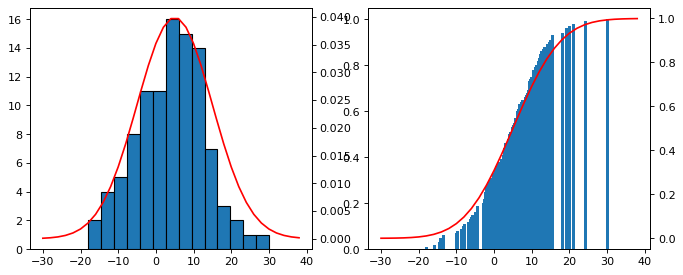

In [2]:
## Simularemos datos de una distribución normal y luego graficaremos su
## función de distribución empírica y la distribución teórica
mu=5
sigma=10
datos = scipy.stats.norm.rvs(loc=mu, scale=sigma, size=100)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(-30,40,2)
##
dvec = []
for i in vec:
    dvec.append(scipy.stats.norm.pdf(x=i, loc=mu, scale=sigma))
ax1.plot(vec,dvec,color='red')

x,cum_norm = ecdf(datos)
axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(-30,40,2)
##
pvec = []
for i in vec:
    pvec.append(scipy.stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec,color='red')
plt.draw()


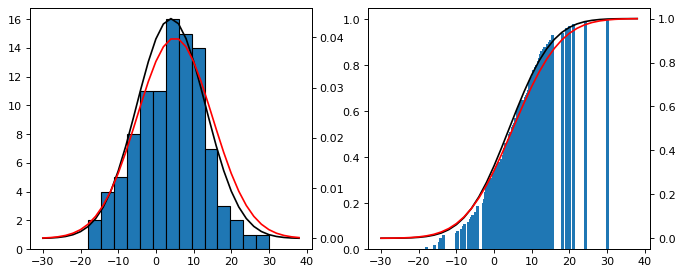

In [3]:
## Calculemos ahora los estimadores máximo verosímiles y veamos como quedan las curvas
mu0,sigma0 = scipy.stats.norm.fit(datos)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(-30,40,2)
##
dvec0 = []
for i in vec:
    dvec0.append(scipy.stats.norm.pdf(x=i, loc=mu0, scale=sigma0))
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(-30,40,2)
##
pvec0 = []
for i in vec:
    pvec0.append(scipy.stats.norm.cdf(x=i, loc=mu0, scale=sigma0))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.draw()


In [4]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
scipy.stats.kstest(datos, 'norm')

KstestResult(statistic=0.6018723813925455, pvalue=3.3964328402445017e-35)

In [5]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
scipy.stats.kstest(datos, 'norm', args=(mu, sigma))

KstestResult(statistic=0.08242843426305957, pvalue=0.4799989700784725)

In [6]:
## Respecto de la distribución con los parámetros MV?
scipy.stats.kstest(datos, 'norm', args=(mu0, sigma0))

KstestResult(statistic=0.03947908145191048, pvalue=0.9960458487623287)

In [7]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros MV?
datos2 = scipy.stats.norm.rvs(loc=mu0, scale= sigma0,size=1000)

scipy.stats.kstest(datos, datos2)

KstestResult(statistic=0.053, pvalue=0.950986253146112)

## ------- ------- ------- ------ -------

#### Ejercicio1: 
repita el ejercicio con:
(i) una muestra de datos simulados de una v.a. discreta de su elección
(ii) una muestra de datos simulados de una v.a. continua de su elección (distinta de la normal)

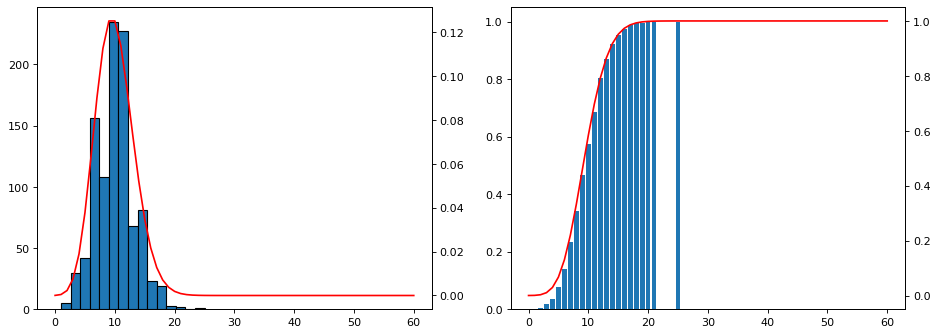

In [8]:
#(i)
k=60
mu=10
datos = scipy.stats.poisson.rvs(mu=mu, loc=0, size=1000)

fig, axs = plt.subplots(1, 2,figsize=(14, 5), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(60/4))
ax1 = axs[0].twinx()
vec = range(k+1)
##
dvec = []
for i in vec:
    dvec.append(scipy.stats.poisson.pmf(k=i, mu=mu))
ax1.plot(vec,dvec,color='red')

x,cum_poisson = ecdf(datos)
axs[1].bar(x,cum_poisson)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(k+1)
##
pvec = []
for i in vec:
    pvec.append(scipy.stats.poisson.cdf(k=i, mu=mu))
ax2.plot(vec,pvec,color='red')
plt.draw()


In [9]:
#Ajuste de datos a poisson
def fit(datos):
    mu0 = np.mean(datos)#La función de verosimilitud de poisson arroja que mu0 es igual a la media de los datos
    return mu0

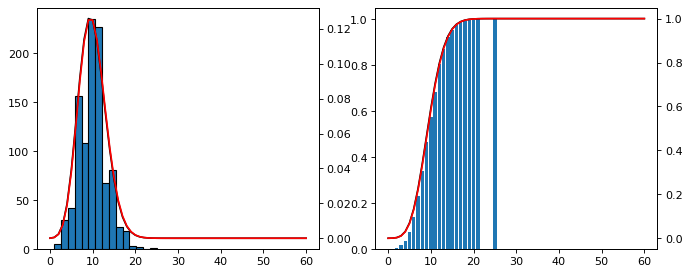

In [10]:
## Calculemos ahora los estimadores máximo verosímiles y veamos como quedan las curvas
mu0 = fit(datos)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(60/4))
ax1 = axs[0].twinx()
vec = range(k+1)
##
dvec0 = []
for i in vec:
    dvec0.append(scipy.stats.poisson.pmf(k=i, mu=mu0))
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x,cum_poisson)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(k+1)
##
pvec0 = []
for i in vec:
    pvec0.append(scipy.stats.poisson.cdf(k=i, mu=mu0))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.draw()


Para las distribuciones de v.a discretas no se puede aplicar KS-Test, sin embargo por los gráficos podríamos decir que los datos se ajustan bien a la distribución de poisson

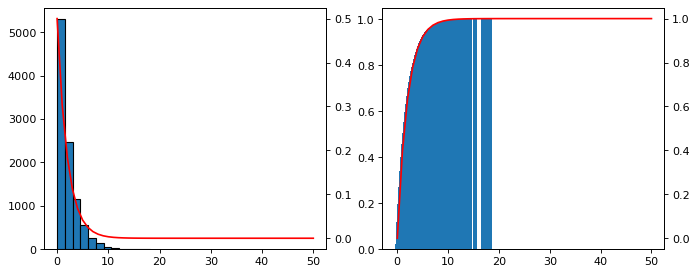

In [11]:
#(ii)
k=50
lamb=0.5
datos = scipy.stats.expon.rvs(scale=1/lamb , size=10000)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(50/4))
ax1 = axs[0].twinx()
vec = list(range(k+1))
##
dvec = []
for i in vec:
    dvec.append(scipy.stats.expon.pdf(x=i, scale=1/lamb))
ax1.plot(vec,dvec,color='red')

x,cum_expon = ecdf(datos)
axs[1].bar(x,cum_expon)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = list(range(k+1))
##
pvec = []
for i in vec:
    pvec.append(scipy.stats.expon.cdf(x=i, scale=1/lamb))
ax2.plot(vec,pvec,color='red')
plt.draw()


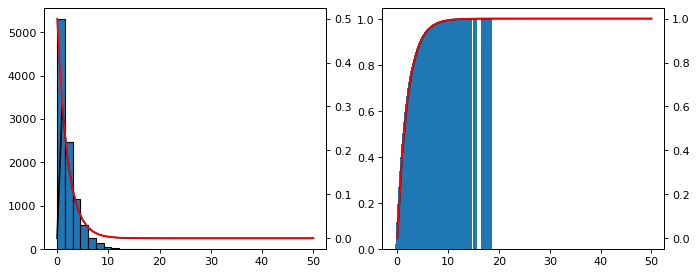

In [12]:
## Calculemos ahora los estimadores máximo verosímiles y veamos como quedan las curvas
loc0,lamb0 = scipy.stats.expon.fit(datos)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(50/4))
ax1 = axs[0].twinx()
vec = list(range(k+1))
##
dvec0 = []
for i in vec:
    dvec0.append(scipy.stats.expon.pdf(x=i, loc=loc0, scale=lamb0))
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x,cum_expon)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = list(range(k+1))
##
pvec0 = []
for i in vec:
    pvec0.append(scipy.stats.expon.cdf(x=i, loc=loc0, scale=lamb0))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.draw()

In [13]:
scipy.stats.kstest(datos, 'expon') ##se compara con la exponencial std, se rechaza cuando pvalue es <1%

KstestResult(statistic=0.25391213791194484, pvalue=0.0)

In [14]:
scipy.stats.kstest(datos, 'expon', args=(0, 1/lamb))##si se agregan los argumentos el resultado cambia

KstestResult(statistic=0.006888589143693169, pvalue=0.7269584331466652)

In [15]:
scipy.stats.kstest(datos, 'expon', args=(loc0, lamb0)) #con los datos ajustados el resultado vuelve a variar

KstestResult(statistic=0.006701728205946472, pvalue=0.7574702656798005)

In [16]:
datos2 = scipy.stats.expon.rvs(loc=loc0, scale= lamb0, size=10000)

scipy.stats.kstest(datos, datos2) #si se compara con un nuevo set de datos ajustados, la hipótesis se acepta con pvalue>78%

KstestResult(statistic=0.009, pvalue=0.8127749152563353)

## -------- -------- ------- -------- -------

In [35]:
## Analizaremos que ocurre con datos reales
vuelos = pd.read_csv('formatted_flights.csv.txt')

In [18]:
vuelos.head()

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.


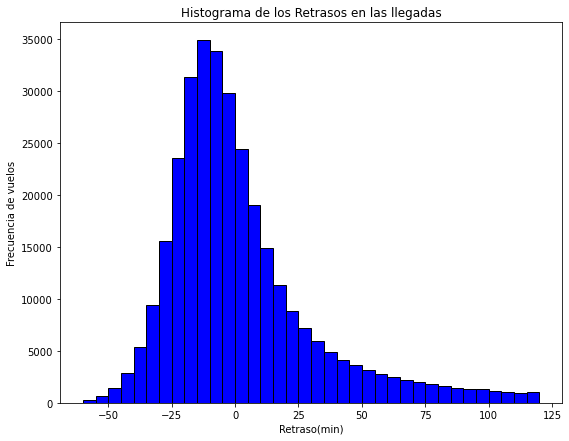

In [19]:
figsize(9, 7)

# Hacer histograma usando matplotlib, los bins deben ser enteros

plt.hist(vuelos['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Agrega texto
plt.title('Histograma de los Retrasos en las llegadas')
plt.xlabel('Retraso(min)'); plt.ylabel('Frecuencia de vuelos');

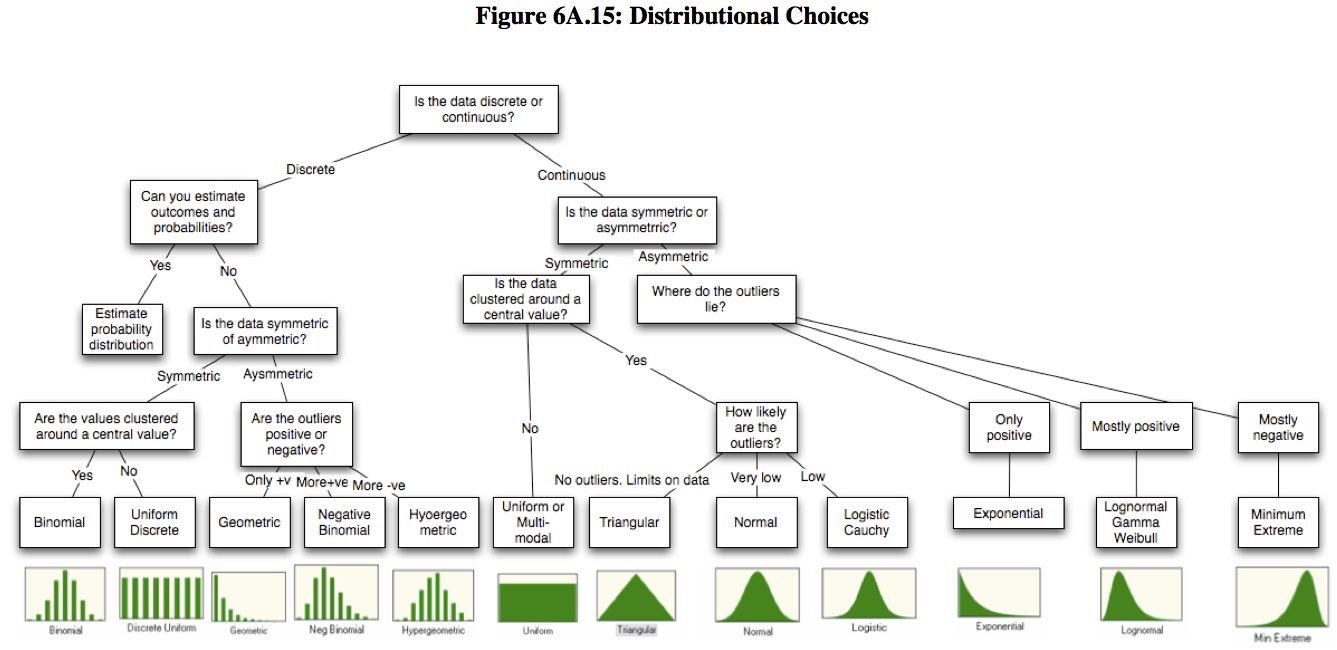

-60.0


(array([  276.,   636.,  1394.,  2820.,  5339.,  9420., 15551., 23546.,
        31319., 34857., 33790., 29786., 24391., 19028., 14894., 11324.,
         8815.,  7159.,  5908.,  4896.,  4130.,  3630.,  3139.,  2782.,
         2455.,  2179.,  1973.,  1805.,  1646.,  1454.,  1360.,  1286.,
         1167.,  1013.,   945.,  1000.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180.]),
 <BarContainer object of 36 artists>)

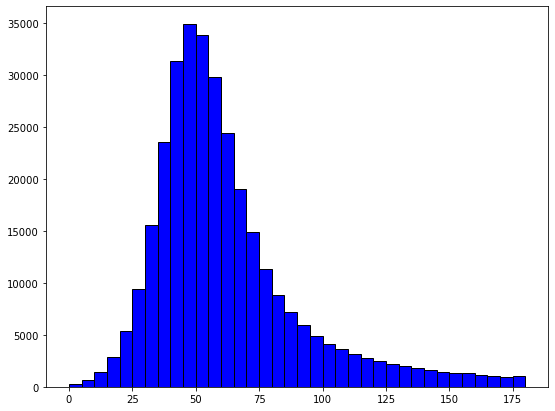

In [181]:
datos1 = vuelos['arr_delay']
datosMin = datos1.min()
print(datosMin)
datos1 = datos1 - datosMin
plt.hist(datos1, color = 'blue', edgecolor = 'black',
         bins = int(180/5))



(0.3766776503562653, -9.748600375204242, 66.05776778737324)


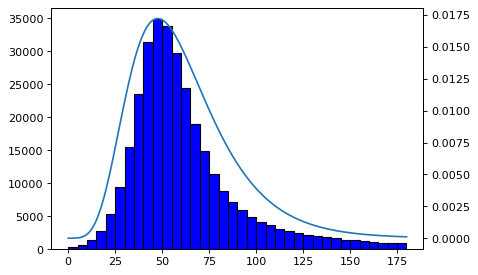

In [182]:
## ajuste de distribución LogNormal considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

ax.hist(datos1, color = 'blue', edgecolor = 'black',
         bins = int(180/5))
ax2 = ax.twinx()
args = scipy.stats.lognorm.fit(datos1)
print(args)
vec = list(range(181))

pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args[0],scale=args[2],loc=args[1]))
ax2.plot(vec,pvec)
plt.draw()

In [183]:
datos2 = scipy.stats.lognorm.rvs(*args,size=100)

scipy.stats.kstest(datos1, datos2)

KstestResult(statistic=0.0879957302286567, pvalue=0.39799212466096845)

## --------- --------- ---------- -------- 

#### Ejercicio 2:

(i) Aumente el tamaño de la segunda muestra. Cambia el resultado? ¿Por qué?
(ii) Repita el análisis de los datos, considerando por separado los datos de las 5 aerolíneas. Hay diferencias en las distribuciones empíricas, los parámetros estimados y en el ajuste de la distribución de probabilidad? Comente sus resultados.

### 2.1) Desarrollo

In [199]:
datos2_100 = scipy.stats.lognorm.rvs(*args,size=100)

scipy.stats.kstest(datos1, datos2_100)


KstestResult(statistic=0.09358768010141494, pvalue=0.3247276467442396)

In [200]:
datos2_1000 = scipy.stats.lognorm.rvs(*args,size=1000)

scipy.stats.kstest(datos1, datos2_1000)

KstestResult(statistic=0.05422024956403548, pvalue=0.0054748630651422865)

In [201]:
datos2_10000 = scipy.stats.lognorm.rvs(*args,size=10000)

scipy.stats.kstest(datos1, datos2_10000)

KstestResult(statistic=0.06216463248116599, pvalue=5.209142884061265e-33)

In [202]:
datos2_100000 = scipy.stats.lognorm.rvs(*args,size=100000)
scipy.stats.kstest(datos1, datos2_100000)

KstestResult(statistic=0.05709514715574582, pvalue=7.297878061624987e-216)

In [203]:
datos2_1000000 = scipy.stats.lognorm.rvs(*args,size=1000000)
scipy.stats.kstest(datos1, datos2_1000000)

KstestResult(statistic=0.057701038071602206, pvalue=0.0)

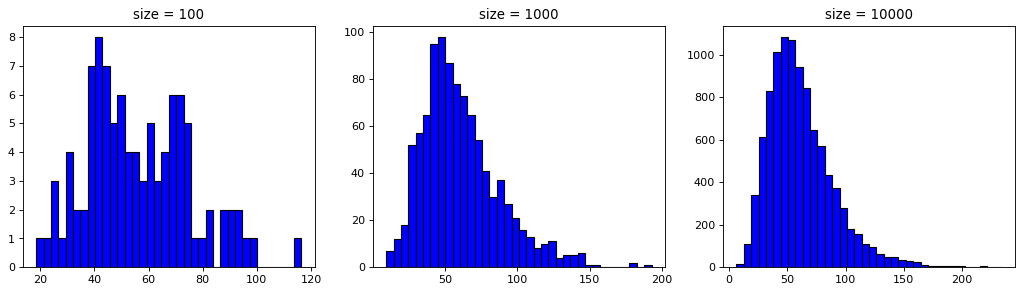

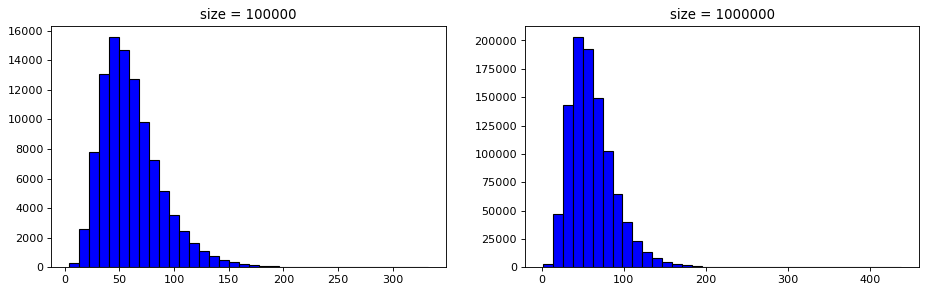

In [218]:
fig, ax = plt.subplots(1, 3,figsize=(16, 4), dpi=80)
fig, ax2 = plt.subplots(1, 2,figsize=(14, 4), dpi=80)
ax[0].hist(datos2_100, color = 'blue', edgecolor = 'black',
         bins = int(180/5));
ax[1].hist(datos2_1000, color = 'blue', edgecolor = 'black',
         bins = int(180/5));
ax[2].hist(datos2_10000, color = 'blue', edgecolor = 'black',
         bins = int(180/5));
ax2[0].hist(datos2_100000, color = 'blue', edgecolor = 'black',
         bins = int(180/5));
ax2[1].hist(datos2_1000000, color = 'blue', edgecolor = 'black',
         bins = int(180/5));

#text

ax[0].set_title('size = 100');
ax[1].set_title('size = 1000');
ax[2].set_title('size = 10000');
ax2[0].set_title('size = 100000');
ax2[1].set_title('size = 1000000');

### 2.1) Analisis 

De esto ultimo podemos observar que al aumentar el tamaño de size nuestra variable datos2 estaria asimilando los valores y forma de la distribucion estudiada, en este caso lognorm. por lo que al ir aumentando size, nuestra variable p-value iria disminuyendo hasta llegar a 0 rechazando datos 1 y aceptando datos2 debido a que esta ultima presenta pruebas mas solidas

### 2.2) Desarrollo

In [36]:
#Separacion de los datos
unitedAL = vuelos['name'] == 'United Air Lines Inc.'
americanAL = vuelos['name'] == 'American Airlines Inc.'
jetBlueAL = vuelos['name'] == 'JetBlue Airways'
deltaAL = vuelos['name'] == 'Delta Air Lines Inc.'
expressAL = vuelos['name'] == 'ExpressJet Airlines Inc.'
unit = vuelos[unitedAL]
american = vuelos[americanAL]
jetBlue = vuelos[jetBlueAL]
delta = vuelos[deltaAL]
express = vuelos[expressAL]


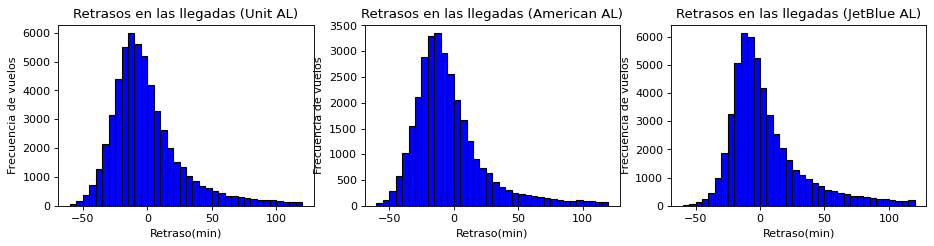

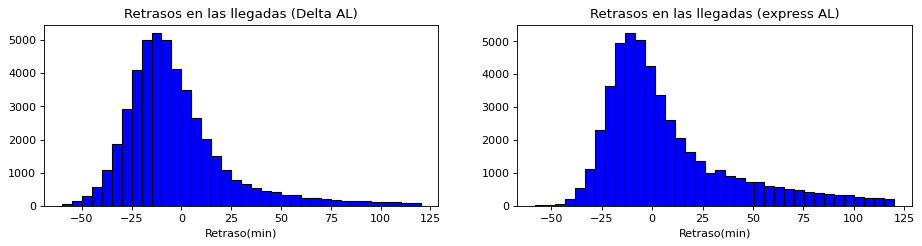

In [37]:
# Hacer histograma usando matplotlib, los bins deben ser enteros
fig, ax = plt.subplots(1, 3, figsize=(14, 3), dpi=80)
fig, ax1 = plt.subplots(1, 2, figsize=(14, 3), dpi=80)
ax[0].hist(unit['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
ax[1].hist(american['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
ax[2].hist(jetBlue['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
ax1[0].hist(delta['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
ax1[1].hist(express['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
# Agrega texto
ax[0].set_title('Retrasos en las llegadas (Unit AL)')
ax[0].set_xlabel('Retraso(min)'); ax[0].set_ylabel('Frecuencia de vuelos');
ax[1].set_title('Retrasos en las llegadas (American AL)')
ax[1].set_xlabel('Retraso(min)'); ax[1].set_ylabel('Frecuencia de vuelos');
ax[2].set_title('Retrasos en las llegadas (JetBlue AL)')
ax[2].set_xlabel('Retraso(min)'); ax[2].set_ylabel('Frecuencia de vuelos');
ax1[0].set_title('Retrasos en las llegadas (Delta AL)')
ax1[0].set_xlabel('Retraso(min)'); ax[0].set_ylabel('Frecuencia de vuelos');
ax1[1].set_title('Retrasos en las llegadas (express AL)')
ax1[1].set_xlabel('Retraso(min)'); ax[1].set_ylabel('Frecuencia de vuelos');


-60.0
-60.0
-60.0
-60.0
-58.0


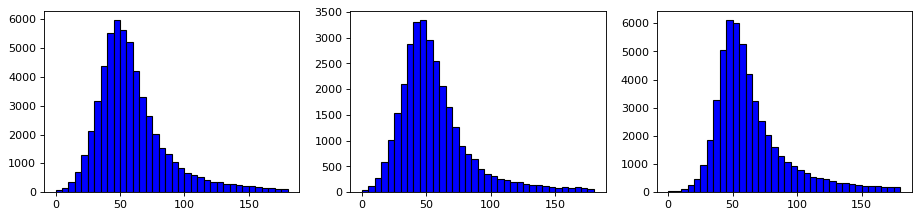

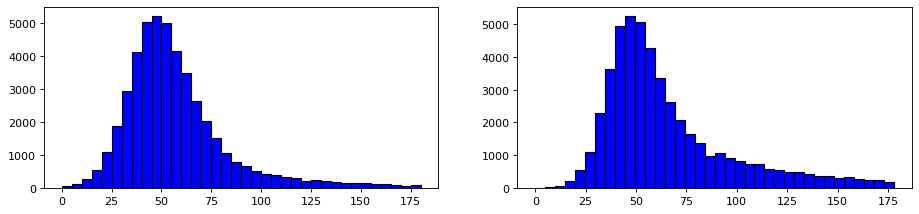

In [38]:
#UNIT

datos1_unit = unit['arr_delay']
datosMin = datos1_unit.min()
print(datosMin)
datos1_unit = datos1_unit - datosMin

#AMERICAN

datos1_american = american['arr_delay']
datosMin = datos1_american.min()
print(datosMin)
datos1_american = datos1_american - datosMin


#JETBLUE

datos1_jetBlue = jetBlue['arr_delay']
datosMin = datos1_jetBlue.min()
print(datosMin)
datos1_jetBlue = datos1_jetBlue - datosMin


#DELTA
datos1_delta = delta['arr_delay']
datosMin = datos1_delta.min()
print(datosMin)
datos1_delta = datos1_delta - datosMin

#EXPRESS
datos1_express = express['arr_delay']
datosMin = datos1_express.min()
print(datosMin)
datos1_express = datos1_express - datosMin

#GRAFICOS

fig, ax = plt.subplots(1, 3, figsize=(14, 3), dpi=80)
fig, ax1 = plt.subplots(1, 2, figsize=(14, 3), dpi=80)
ax[0].hist(datos1_unit, color = 'blue', edgecolor = 'black',
         bins = int(180/5));
ax[1].hist(datos1_american, color = 'blue', edgecolor = 'black',
         bins = int(180/5));
ax[2].hist(datos1_jetBlue, color = 'blue', edgecolor = 'black',
         bins = int(180/5));
ax1[0].hist(datos1_delta, color = 'blue', edgecolor = 'black',
         bins = int(180/5));
ax1[1].hist(datos1_express, color = 'blue', edgecolor = 'black',
         bins = int(180/5));


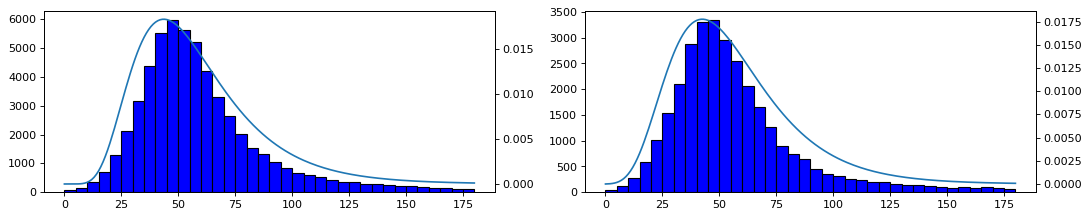

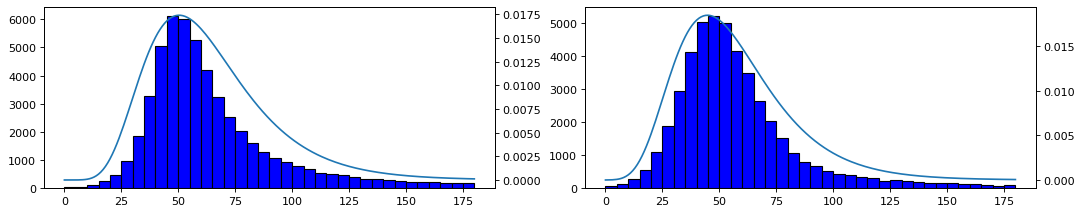

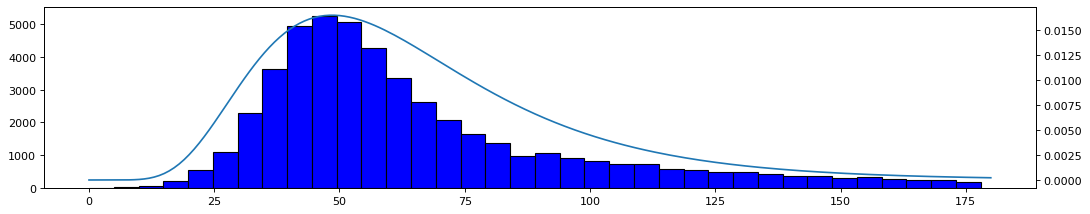

In [39]:
## ajuste de distribución LogNormal considerando Estimadores de MV
fig, ax = plt.subplots(1, 2,figsize=(16, 3), dpi=80)
fig, ax2 = plt.subplots(1, 2,figsize=(16, 3), dpi=80)
fig, ax3 = plt.subplots(1, 1,figsize=(16, 3), dpi=80)

#UNIT AL

ax[0].hist(datos1_unit, color = 'blue', edgecolor = 'black',
         bins = int(180/5));
ax4 = ax[0].twinx();
args_unit = scipy.stats.lognorm.fit(datos1_unit)
vec = list(range(181))

pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args_unit[0],scale=args_unit[2],loc=args_unit[1]))
ax4.plot(vec,pvec);


#AMERICAN AL
ax[1].hist(datos1_american, color = 'blue', edgecolor = 'black',
         bins = int(180/5));
ax4 = ax[1].twinx();
args_american = scipy.stats.lognorm.fit(datos1_american)
vec = list(range(181))

pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args_american[0],scale=args_american[2],loc=args_american[1]))
ax4.plot(vec,pvec);


#JETBLUE AL
ax2[0].hist(datos1_jetBlue, color = 'blue', edgecolor = 'black',
         bins = int(180/5));
ax4 = ax2[0].twinx();
args_jetblue = scipy.stats.lognorm.fit(datos1_jetBlue)
vec = list(range(181))

pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args_jetblue[0],scale=args_jetblue[2],loc=args_jetblue[1]))
ax4.plot(vec,pvec);

#delta AL
ax2[1].hist(datos1_delta, color = 'blue', edgecolor = 'black',
         bins = int(180/5));
ax4 = ax2[1].twinx();
args_delta = scipy.stats.lognorm.fit(datos1_delta)
vec = list(range(181))

pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args_delta [0],scale=args_delta[2],loc=args_delta [1]))
ax4.plot(vec,pvec);


#express
ax3.hist(datos1_express, color = 'blue', edgecolor = 'black',
         bins = int(180/5));
ax4 = ax3.twinx();
args_express = scipy.stats.lognorm.fit(datos1_express)
vec = list(range(181))

pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args_express[0],scale=args_express[2],loc=args_express[1]))
ax4.plot(vec,pvec);
plt.show()

In [40]:
datos2_unit = scipy.stats.lognorm.rvs(*args_unit,size=100)

scipy.stats.kstest(datos1_unit, datos2_unit)

KstestResult(statistic=0.07843467769122942, pvalue=0.5435039692395112)

In [45]:
datos2_american = scipy.stats.lognorm.rvs(*args_american,size=100)

scipy.stats.kstest(datos1_american, datos2_american)

KstestResult(statistic=0.1004782511138892, pvalue=0.24783066936450715)

In [42]:
datos2_jetblue = scipy.stats.lognorm.rvs(*args_jetblue,size=100)

scipy.stats.kstest(datos1_jetBlue, datos2_jetblue)

KstestResult(statistic=0.10199246178276922, pvalue=0.23289398246443424)

In [43]:
datos2_delta = scipy.stats.lognorm.rvs(*args_delta,size=100)
scipy.stats.kstest(datos1_delta, datos2_delta)

KstestResult(statistic=0.05561504691400532, pvalue=0.8993760662330477)

In [44]:
datos2_express = scipy.stats.lognorm.rvs(*args_express,size=100)
scipy.stats.kstest(datos1_express, datos2_express)

KstestResult(statistic=0.10789025719043605, pvalue=0.1811250304473387)

### 2.2) Analisis

Repita el análisis de los datos, considerando por separado los datos de las 5 aerolíneas. Hay diferencias en las distribuciones empíricas, los parámetros estimados y en el ajuste de la distribución de probabilidad? Comente sus resultados.

Al observar los gráficos podemos darnos cuenta que en los datos de las aerolíneas por separado no existe una diferencia muy notoria entre las distribuciones empíricas y los ajustes de estas. Y al realizar los KSTest correspondientes, notamos que los datos se ajustan a una distribución lognormal.

#### Ejercicio 3: 
Considere los datos analizados en la sesión anterior y estudie la posibilidad de ajustarles alguna distribución de probabilidad conocida, incluyendo estimación de parámetros por máxima verosimilitud y  el test de ajuste de k-s respectivo.

se importaran los datos de temperaturas del laboratorio anterior.

In [5]:
temperature = pd.read_csv('data/formatted_temperature2019.csv')
temperature.head()

,day,Ts_Valor
0,01-01-2019,14.770833
1,01-02-2019,13.187500
2,01-03-2019,13.066667
3,01-04-2019,17.750000
4,01-05-2019,18.700000


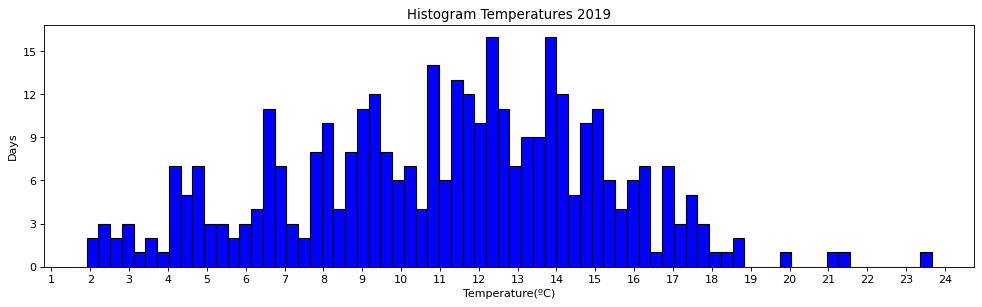

In [238]:
fig, ax = plt.subplots(1, 1,figsize=(15, 4), dpi=80);

# Make the histogram using matplotlib, bins must be integet
ax.hist(temperature['Ts_Valor'], color = 'blue', edgecolor = 'black', bins=(temperature['Ts_Valor'].count()//5));

# Agrega texto
plt.title('Histogram Temperatures 2019')
plt.xlabel('Temperature(ºC)'); plt.ylabel('Days');
# ticks ejes
plt.xticks(np.arange(1, 25, 1));
plt.yticks(np.arange(0, 18, 3));

De esto podemos ver que el grafico es continuo por lo que necesitaremos ajustar alguna distribucion continua. Ademas tambien se puede ver que es asimetrica 

In [239]:
datos1_temp = np.around(temperature['Ts_Valor'], decimals=7)
datosMin = datos1_temp.min()
print(datosMin)
datos1_temp = datos1_temp - datosMin

1.9086957


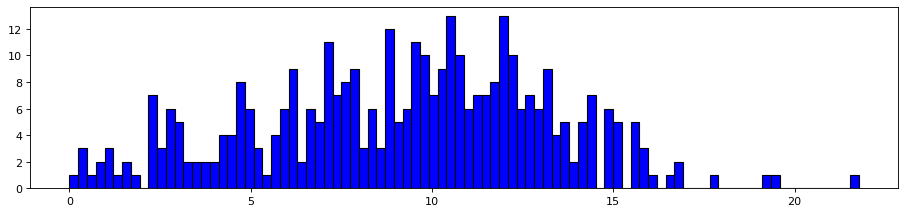

In [240]:
fig, ax = plt.subplots(1, 1, figsize=(14, 3), dpi=80)
ax.hist(datos1_temp, color = 'blue', edgecolor = 'black',
         bins = int(360/4));

In [241]:
#ya que en la base de datos hay entradas vacías tenemos que setear esas entradas en 0
for i in range(0, len(datos1_temp)):
    if np.isnan(datos1_temp[i]):
        datos1_temp[i] = 0

(0.3766776503562653, -9.748600375204242, 66.05776778737324)


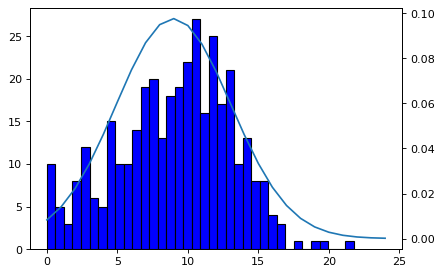

In [242]:
## ajuste de distribución LogNormal considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

ax.hist(datos1_temp, color = 'blue', edgecolor = 'black',
         bins = int(180/5))
ax2 = ax.twinx()
args_temp = scipy.stats.lognorm.fit(datos1_temp)
print(args)
vec = list(range(25))

pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args_temp[0],scale=args_temp[2],loc=args_temp[1]))
ax2.plot(vec,pvec)
plt.draw()

In [243]:
datos2_temp = scipy.stats.lognorm.rvs(*args_temp,size=100)

scipy.stats.kstest(datos1_temp, datos2_temp)

KstestResult(statistic=0.0873972602739726, pvalue=0.5520588279467431)

De esto ultimo podemos ver que se acepta la hipotesis 1 (datos1) y se rechaza la hipotesis 2(datos2), demostrando que podemos ajustarle una distribucion lognorm a los datos de las temperaturas.

## Ahora repetiremos el experimento anterior pero para cada estacion del año

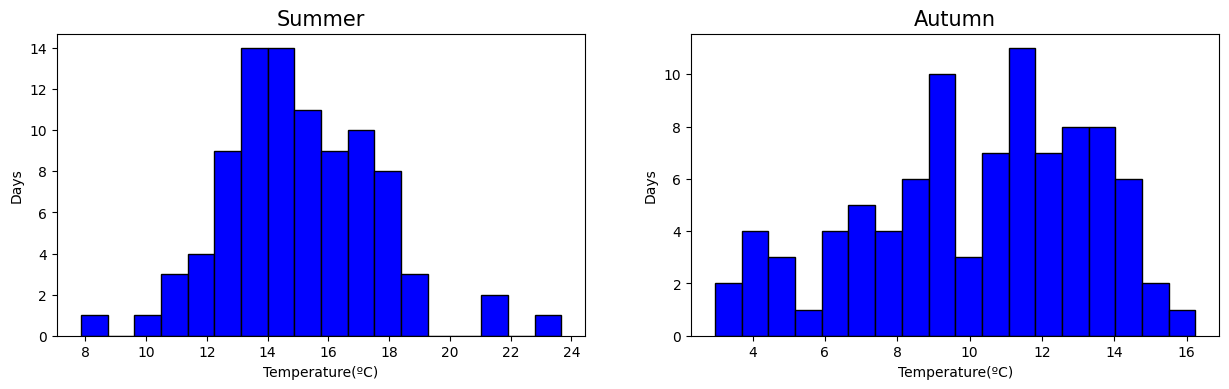

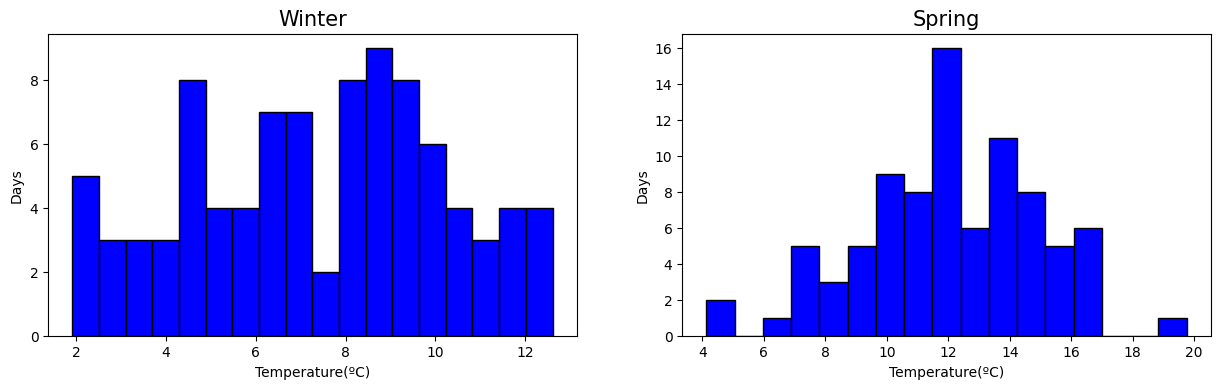

In [21]:
Summer = temperature.set_index('day').loc['01-01-2019':'03-20-2019'].append(temperature.set_index('day').loc['12-21-2019':'12-31-2019'])
Autumn = temperature.set_index('day').loc['03-21-2019':'06-20-2019']
Winter = temperature.set_index('day').loc['06-21-2019':'09-20-2019']
Spring = temperature.set_index('day').loc['09-21-2019':'12-20-2019']
#Seasons histograms
fig, ax = plt.subplots(1, 2,figsize=(15, 4), dpi=100 )
fig, ax1 = plt.subplots(1, 2,figsize=(15, 4), dpi=100)

# Make the histogram using matplotlib, bins must be integet
ax[0].hist(Summer['Ts_Valor'], color = 'blue', edgecolor = 'black', bins=(Summer['Ts_Valor'].count()//5))
ax[0].set_title('Summer', fontsize=15)
ax[1].hist(Autumn['Ts_Valor'], color = 'blue', edgecolor = 'black', bins=(Autumn['Ts_Valor'].count()//5))
ax[1].set_title('Autumn', fontsize=15)
ax1[0].hist(Winter['Ts_Valor'], color = 'blue', edgecolor = 'black', bins=(Winter['Ts_Valor'].count()//5))
ax1[0].set_title('Winter', fontsize=15)
ax1[1].hist(Spring['Ts_Valor'], color = 'blue', edgecolor = 'black', bins=(Spring['Ts_Valor'].count()//5))
ax1[1].set_title('Spring', fontsize=15)

for a in ax.flat:
    a.set(xlabel='Temperature(ºC)', ylabel='Days')
for a1 in ax1.flat:
    a1.set(xlabel='Temperature(ºC)', ylabel='Days')
    
plt.show()

In [7]:
np.mean(Spring['Ts_Valor'])

12.046772618461192

Ahora estudiaremos si le podemos ajustar una distribucion lognorm a cada una de estas estaciones

In [22]:
#ya que en la base de datos hay entradas vacías por lo que seteamos esas entradas en la media de esa temporada
for i in range(0, len(Spring['Ts_Valor'])):
    if np.isnan(Spring['Ts_Valor'][i]):
        Spring['Ts_Valor'][i] = np.mean(Spring['Ts_Valor'])

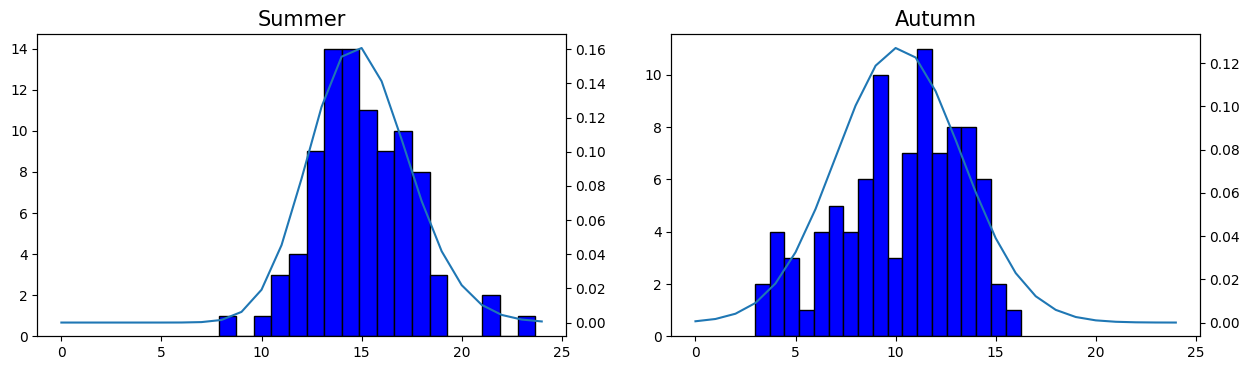

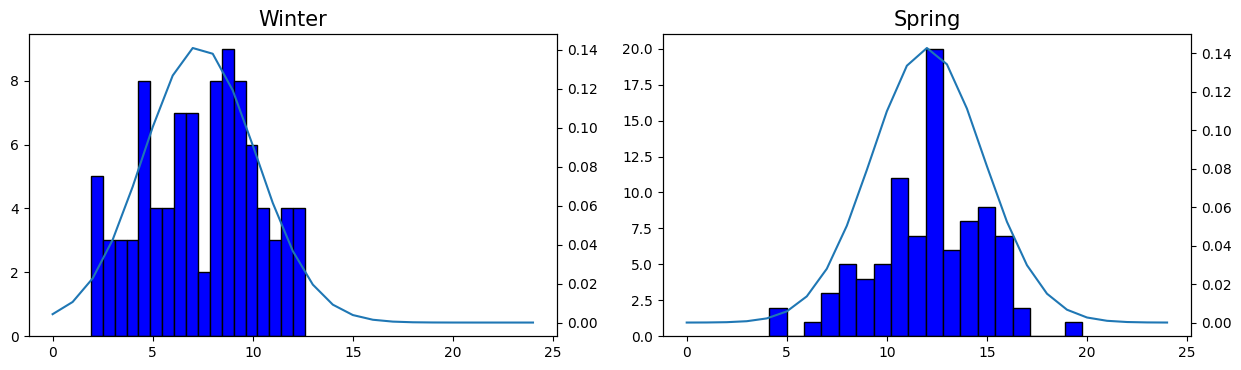

In [26]:
#Seasons histograms
fig, ax = plt.subplots(1, 2,figsize=(15, 4), dpi=100)
fig, ax1 = plt.subplots(1, 2,figsize=(15, 4), dpi=100)

# SUMMER
ax[0].hist(Summer['Ts_Valor'], color = 'blue', edgecolor = 'black', bins=(Summer['Ts_Valor'].count()//5))
ax[0].set_title('Summer', fontsize=15)
ax2 = ax[0].twinx();
args_summer = scipy.stats.lognorm.fit(Summer['Ts_Valor'])
vec = list(range(25))
pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args_summer[0],scale=args_summer[2],loc=args_summer[1]))
ax2.plot(vec,pvec);

#AUTUMN
ax[1].hist(Autumn['Ts_Valor'], color = 'blue', edgecolor = 'black', bins=(Autumn['Ts_Valor'].count()//5))
ax[1].set_title('Autumn', fontsize=15)
ax2 = ax[1].twinx();
args_autumn = scipy.stats.lognorm.fit(Autumn['Ts_Valor'])
vec = list(range(25))
pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args_autumn[0],scale=args_autumn[2],loc=args_autumn[1]))
ax2.plot(vec,pvec);

#WINTER
ax1[0].hist(Winter['Ts_Valor'], color = 'blue', edgecolor = 'black', bins=(Winter['Ts_Valor'].count()//5))
ax1[0].set_title('Winter', fontsize=15)
ax2 = ax1[0].twinx();
args_winter = scipy.stats.lognorm.fit(Winter['Ts_Valor'])
vec = list(range(25))
pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args_winter[0],scale=args_winter[2],loc=args_winter[1]))
ax2.plot(vec,pvec);

#SPRING
ax1[1].hist(Spring['Ts_Valor'], color = 'blue', edgecolor = 'black', bins=(Spring['Ts_Valor'].count()//5))
ax1[1].set_title('Spring', fontsize=15)
ax2 = ax1[1].twinx();
args_spring = scipy.stats.lognorm.fit(Spring['Ts_Valor'])
vec = list(range(25))
pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args_spring[0],scale=args_spring[2],loc=args_spring[1]))
ax2.plot(vec,pvec);

plt.show()

se realizara el kstest para ver si es aceptable ocupar esta distribucion

In [27]:
datos2_summer = scipy.stats.lognorm.rvs(*args_summer,size=100)

scipy.stats.kstest(Summer['Ts_Valor'], datos2_summer)

KstestResult(statistic=0.08222222222222222, pvalue=0.874018746064663)

In [28]:
datos2_autumn = scipy.stats.lognorm.rvs(*args_autumn,size=100)

scipy.stats.kstest(Autumn['Ts_Valor'], datos2_autumn)

KstestResult(statistic=0.10652173913043478, pvalue=0.5985673344158287)

In [29]:
datos2_winter = scipy.stats.lognorm.rvs(*args_winter,size=100)

scipy.stats.kstest(Winter['Ts_Valor'], datos2_winter)

KstestResult(statistic=0.1108695652173913, pvalue=0.5490258515069835)

In [30]:
datos2_spring = scipy.stats.lognorm.rvs(*args_spring,size=100)

scipy.stats.kstest(Spring['Ts_Valor'], datos2_spring)

KstestResult(statistic=0.09835164835164835, pvalue=0.695759581572108)

Dados estos valores pvalue, observamos que los datos por temporada se ajustan a una distribución lognormal